<a href="https://colab.research.google.com/github/kebabee/autoencoder-memory/blob/main/associative_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Select 100 examples (10 examples for each digit)
selected_digits = []
for digit in range(10):
    idx = np.where(y_train == digit)[0][:10]
    selected_digits.append(x_train[idx])

selected_digits = np.array(selected_digits).reshape(-1, 28, 28)
selected_digits = selected_digits.astype('float32') / 255.0
selected_digits = selected_digits.reshape(-1, 784)

# Define the autoencoder model
input_img = Input(shape=(784,))
encoded = Dense(256, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
decoded = Dense(256, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(selected_digits, selected_digits,
                epochs=200,
                batch_size=10,
                shuffle=True)

# Save the trained model
autoencoder.save('simple_autoencoder.h5')

# Encode and decode some digits
decoded_imgs = autoencoder.predict(selected_digits)

Epoch 1/200
10/10 [==============================] - 1s 8ms/step - loss: 0.6054
Epoch 2/200
10/10 [==============================] - 0s 8ms/step - loss: 0.3368
Epoch 3/200
10/10 [==============================] - 0s 9ms/step - loss: 0.2834
Epoch 4/200
10/10 [==============================] - 0s 9ms/step - loss: 0.2609
Epoch 5/200
10/10 [==============================] - 0s 9ms/step - loss: 0.2502
Epoch 6/200
10/10 [==============================] - 0s 8ms/step - loss: 0.2394
Epoch 7/200
10/10 [==============================] - 0s 8ms/step - loss: 0.2275
Epoch 8/200
10/10 [==============================] - 0s 8ms/step - loss: 0.2151
Epoch 9/200
10/10 [==============================] - 0s 9ms/step - loss: 0.2021
Epoch 10/200
10/10 [==============================] - 0s 8ms/step - loss: 0.1899
Epoch 11/200
10/10 [==============================] - 0s 10ms/step - loss: 0.1786
Epoch 12/200
10/10 [==============================] - 0s 9ms/step - loss: 0.1690
Epoch 13/200
10/10 [================

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


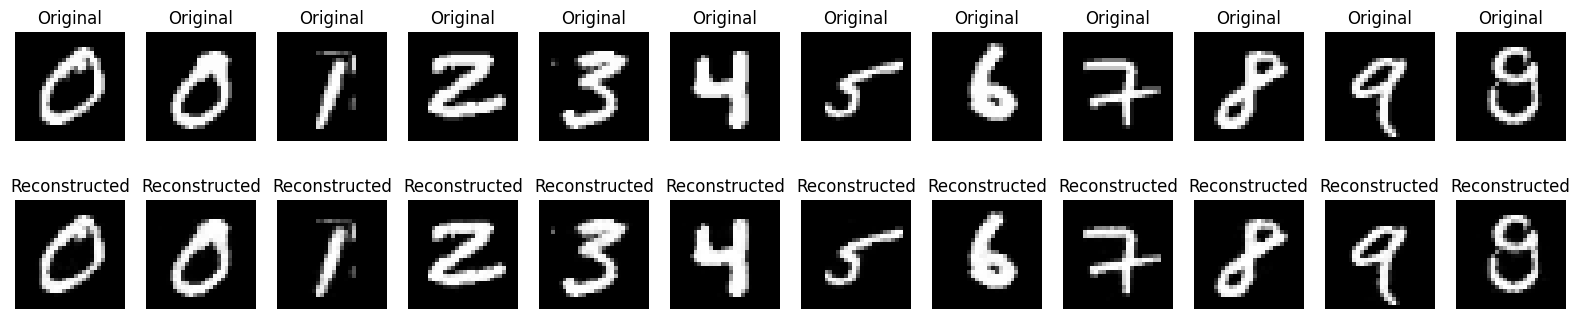

In [8]:
def plot_images(original, reconstructed, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(original[9*i].reshape(28, 28), cmap='gray')
        plt.title("Original")
        plt.axis('off')

        # Display reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(reconstructed[9*i].reshape(28, 28), cmap='gray')
        plt.title("Reconstructed")
        plt.axis('off')
    plt.show()

# Display the first 10 original and reconstructed images
plot_images(selected_digits, decoded_imgs, n=12)

4/4 [==============================] - 0s 6ms/step


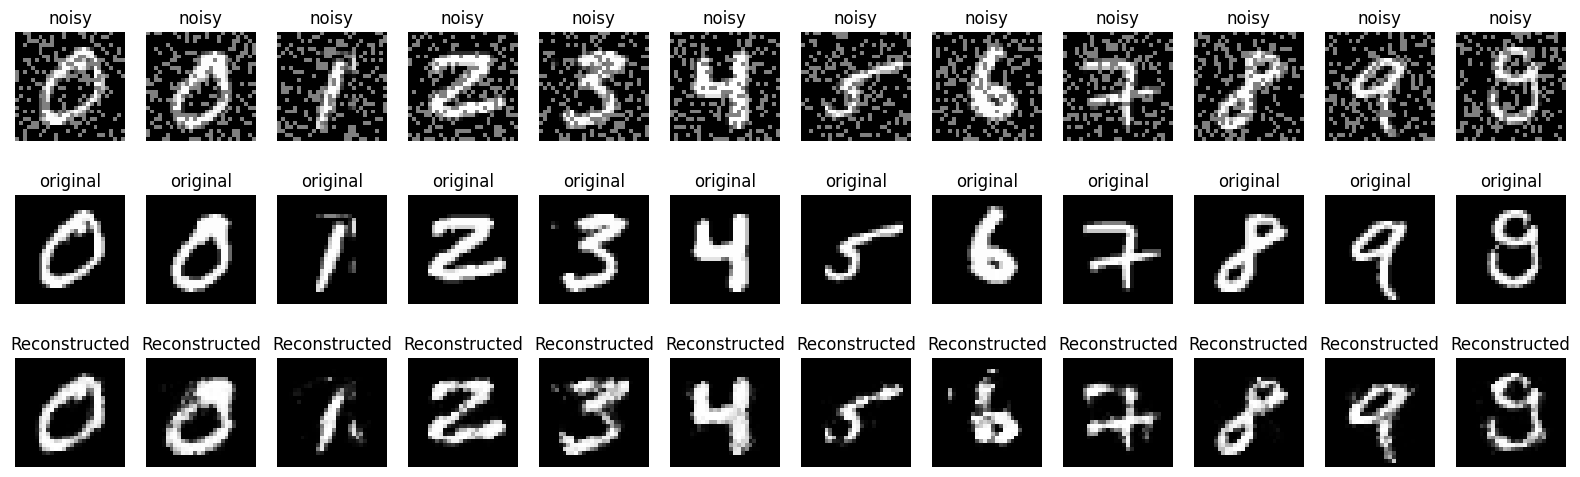

In [27]:
# Add noise to the images (set 25% random pixels to 1)
def add_noise(images, noise_factor=0.25):
    noisy_images = images.copy()
    n_pixels = int(noise_factor * images.shape[1])
    for img in noisy_images:
        noise_idx = np.random.choice(images.shape[1], n_pixels, replace=False)
        img[noise_idx] = 0.5
    return noisy_images

def plot_images(original, noisy, reconstructed, n=10):
    plt.figure(figsize=(20, 6))
    for i in range(n):
        # Display original
        ax = plt.subplot(3, n, i + 1)
        plt.imshow(noisy[9*i].reshape(28, 28), cmap='gray')
        plt.title("noisy")
        plt.axis('off')

        # Display noisy
        ax = plt.subplot(3, n, i + 1 + n)
        plt.imshow(original[9*i].reshape(28, 28), cmap='gray')
        plt.title("original")
        plt.axis('off')

        # Display reconstruction
        ax = plt.subplot(3, n, i + 1 + 2 * n)
        plt.imshow(reconstructed[9*i].reshape(28, 28), cmap='gray')
        plt.title("Reconstructed")
        plt.axis('off')
    plt.show()

noisy_digits = add_noise(selected_digits)

decoded_imgs_2 = autoencoder.predict(noisy_digits)

plot_images(selected_digits, noisy_digits, decoded_imgs_2, n=12)

In [28]:
difference_noisy_original = np.abs(selected_digits - noisy_digits)
difference_decoded_original = np.abs(selected_digits - decoded_imgs_2)

# Calculate the mean absolute difference
mean_diff_noisy_original = np.mean(difference_noisy_original)
mean_diff_decoded_original = np.mean(difference_decoded_original)

print(f"Mean difference between original and noisy: {mean_diff_noisy_original}")
print(f"Mean difference between original and reconstructed: {mean_diff_decoded_original}")

Mean difference between original and noisy: 0.11810438334941864
Mean difference between original and reconstructed: 0.03923936188220978
